<a href="https://colab.research.google.com/github/bhoomikadg26/Deeplearning/blob/main/Building_a_CNN_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week - 5  Building a CNN for Image Classification

Design and implement a CNN model (with 4+ layers of convolutions) to classify multi category image datasets. Use the concept of regularization and dropout while designing the CNN model.

Use CIFAR-10 dataset.

Record the Training accuracy and Test accuracy corresponding to the following architectures:

       a. Base Model

       b. Model with L1 Regularization

       c. Model with L2 Regularization

       d. Model with Dropout

       e. Model with both L2 (or L1) and Dropout

Dataset:  https://www.kaggle.com/c/cifar-10/

**Base Model:**

In [4]:
import keras

from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1,28,28, 1)
test_X = test_X.reshape(-1,28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

ValueError: cannot reshape array of size 153600000 into shape (28,28,1)

**Model with L1 Regularization**

In [6]:
# L1 Regularizer
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l1
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256,(3,3),input_shape=(28, 28, 1),kernel_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3),kernel_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

ValueError: cannot reshape array of size 153600000 into shape (28,28,1)

**Model with L2 Regularization**

In [8]:
# L2 regularizer
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 28,28, 1)

test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256,(3,3),input_shape=(28,28,1), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3),))

#kernel_regularizer=l2(0.01)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1),))
#kernel_regularizer=l2(0.01)


model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3,3),))

#kernel_regularizer=l2(0.01)


model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

ValueError: cannot reshape array of size 153600000 into shape (28,28,1)

**Model with Dropout**

In [ ]:
#Dropout
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.20)
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout(0.20)
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout(0.20)
model.add(Conv2D(28, (3,3)))
model.add(Activation('relu'))
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

**Model with both L2 (or L1) and Dropout**

In [ ]:
# L2 regularizer and Dropout
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = cifar10.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

R-20

model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
Dropout(0.20)

model.add(Conv2D(128, (3,3),

#kernel_regularizer=l2(0.01)

))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1),))
#kernel_regularizer=l2(0.01)


model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3,3),))

#kernel_regularizer=l2(0.01)


model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 86ms/step - accuracy: 0.3510 - loss: 1.7592
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.5714 - loss: 1.2076
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6370 - loss: 1.0282
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.6905 - loss: 0.8842
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.7253 - loss: 0.7888
Test loss: 0.85933917760849
Test accuracy: 0.7005000114440918
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Predicted class for the first test image: 3


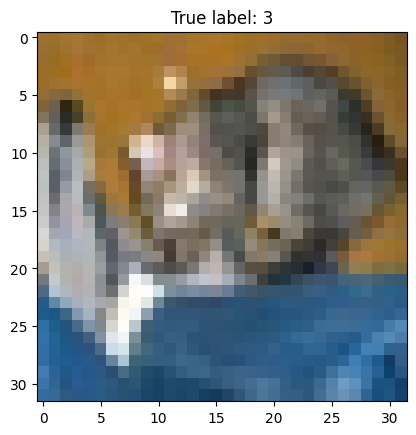

In [5]:
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Normalize data
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, verbose=1)

# Evaluate model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and visualize
predictions = model.predict(test_X)
print("Predicted class for the first test image:", np.argmax(predictions[0]))

plt.imshow(test_X[0])
plt.title(f"True label: {np.argmax(test_Y_one_hot[0])}")
plt.show()



Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 533s 678ms/step - accuracy: 0.0998 - loss: 13.2593
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 537s 687ms/step - accuracy: 0.0993 - loss: 3.0388
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 564s 690ms/step - accuracy: 0.1002 - loss: 3.0385
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 523s 668ms/step - accuracy: 0.0979 - loss: 3.0388
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 559s 664ms/step - accuracy: 0.0999 - loss: 3.0385
Test loss: 3.045790910720825
Test accuracy: 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step
Predicted class for the first test image: 4


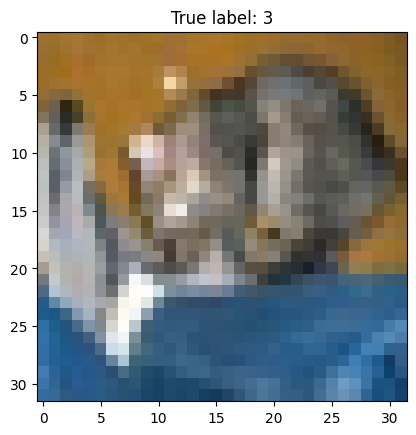

In [7]:
# L1 Regularizer - Fixed version
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l1
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# No reshaping to 28x28x1, keep original size 32x32x3
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build CNN model with L1 regularization
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), kernel_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# You can continue building more layers if needed
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Predict and visualize
predictions = model.predict(test_X)
print("Predicted class for the first test image:", np.argmax(predictions[0]))
plt.imshow(test_X[0])
plt.title(f"True label: {np.argmax(test_Y_one_hot[0])}")
plt.show()


In [ ]:
# L2 Regularizer - Fixed Version
import keras
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.regularizers import l2
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

# Keep original CIFAR-10 shape: 32x32x3
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# One-hot encode the labels
train_Y_one_hot = to_categorical(train_Y, 10)
test_Y_one_hot = to_categorical(test_Y, 10)

# Build CNN model with L2 regularization
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Conv2D(28, (3, 3), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 531s 675ms/step - accuracy: 0.1760 - loss: 2.6662
Epoch 2/5
580/782 ━━━━━━━━━━━━━━━━━━━━ 2:14 667ms/step - accuracy: 0.2859 - loss: 2.0198